In [15]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../")))

from database_operations import DatabaseOperations
from overtake_model import OvertakingModel
from race_data import RaceDataSetup
from race_dataframe import RaceDataframe
from race_sim import RaceSimulator
from evaluation import RaceSimEvaluation, EvaluateMany
from optimisation import Optimisation

import time
from joblib import Parallel, delayed

import pandas as pd
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option('display.max_colwidth', None) 

## Mexico GP

In [16]:
# Initialise all classes
database_ops_mexico = DatabaseOperations(2024, "Mexico City")
race_df_mexico = RaceDataframe(database_ops_mexico)
race_data_mexico = RaceDataSetup(database_ops_mexico, race_df_mexico)
overtake_model_mexico = OvertakingModel(race_df_mexico.race_df)
simulation_mexico = RaceSimulator(race_data_mexico, overtake_model_mexico)

driver = 44
optimise_mexico_44 = Optimisation(race_data_mexico, overtake_model_mexico, driver)
driver = 63
optimise_mexico_63 = Optimisation(race_data_mexico, overtake_model_mexico, driver)

In [17]:
simulation_mexico.simulate()
simulation_mexico.get_results_as_dataframe()

,driver_number,driver_name,pit_schedule,tyre_type,lap_num,sector,sector_time,stint_lap,cumulative_time,gap,pit,pace,position,starting_pos,base_sector_times,tyre_diff,stint_laps_diff,drs_available,retired,overtakes,predicted_overtake
0,55,Carlos Sainz,"{33: 3, 1: 2}",3,71,3,20.659784,39,6263.274114,0.000000,False,31.549575,1,1,"{1: 27.037, 2: 29.296, 3: 19.533}",0,1,False,False,6,False
1,4,Lando Norris,"{31: 3, 1: 2}",3,71,3,20.703931,41,6265.449308,2.175194,False,20.770952,2,2,"{1: 27.204, 2: 29.191, 3: 19.67}",0,-2,False,False,1,False
2,16,Charles Leclerc,"{32: 3, 70: 1, 1: 2}",1,71,3,22.274851,2,6288.469647,23.020339,False,21.660755,3,3,"{1: 27.069, 2: 29.429, 3: 19.693}",2,39,False,False,7,False
3,44,Lewis Hamilton,"{29: 3, 1: 2}",3,71,3,20.863479,43,6299.578047,11.108400,False,20.932355,4,4,"{1: 27.295, 2: 29.546, 3: 19.688}",-2,-41,False,False,6,False
4,81,Oscar Piastri,"{40: 3, 1: 2}",3,71,3,20.743427,32,6310.674003,11.095956,False,20.795339,5,8,"{1: 27.376, 2: 29.546, 3: 20.006}",0,11,False,False,7,False
5,63,George Russell,"{32: 3, 1: 2}",3,71,3,20.987247,40,6311.681661,1.007658,False,21.022026,6,5,"{1: 27.361, 2: 29.263, 3: 19.624}",0,-8,False,False,3,False
6,1,Max Verstappen,"{27: 3, 1: 2}",3,71,3,20.817306,45,6317.422278,5.740616,False,20.890183,7,6,"{1: 27.222, 2: 29.318, 3: 19.631}",0,-5,False,False,2,False
7,20,Kevin Magnussen,"{31: 3, 1: 2}",3,71,3,21.040058,41,6327.308067,9.885789,False,21.082077,8,7,"{1: 27.272, 2: 29.624, 3: 19.854}",0,4,False,False,7,False
8,27,Nico Hulkenberg,"{30: 3, 1: 2}",3,71,3,20.856500,42,6343.899743,16.591676,False,20.935128,9,9,"{1: 27.382, 2: 29.592, 3: 19.841}",0,-1,False,False,4,False
9,10,Pierre Gasly,"{29: 3, 1: 2}",3,71,3,21.015713,43,6363.300474,19.400731,False,21.082269,10,10,"{1: 27.418, 2: 29.585, 3: 19.847}",0,-1,False,False,2,False


In [18]:
evaluation_mexico = RaceSimEvaluation(simulation_mexico, race_df_mexico, database_ops_mexico)
evaluation_mexico.comparison_df

Carlos Sainz 71 6055.8 6055.8
Lando Norris 71 6060.505 6055.8
Charles Leclerc 71 6090.187 6055.8
Lewis Hamilton 71 6100.58 6055.8
Oscar Piastri 71 6120.728 6055.8
George Russell 71 6104.336 6055.8
Max Verstappen 71 6115.358 6055.8
Kevin Magnussen 71 6119.442 6055.8
Nico Hulkenberg 70 6058.52 5975.215
Pierre Gasly 70 6074.387 5975.215
Lance Stroll 70 6080.872 5975.215
Franco Colapinto 70 6083.297 5975.215
Esteban Ocon 70 6095.463 5975.215
Valtteri Bottas 70 6098.027 5975.215
Guanyu Zhou 70 6117.522 5975.215
Liam Lawson 70 6120.266 5975.215
Sergio Perez 70 6129.084 5975.215


,driver_name,laps_completed,position_sim,position_actual,position_error,overtakes_sim,overtakes_actual,overtake_error,cumulative_time_sim,cumulative_time_actual,cumulative_time_error,gap_to_leader_sim,gap_to_leader_actual,gap_error
0,Carlos Sainz,71,1,1.0,0.0,6,0,6,6263.274114,6055.800,207.474114,0.0,0.0,0.0
1,Lando Norris,71,2,2.0,0.0,1,2,-1,6265.449308,6060.505,204.944308,2.175194,4.705,-2.529806
2,Charles Leclerc,71,3,3.0,0.0,7,1,6,6288.469647,6090.187,198.282647,25.195533,34.387,-9.191467
3,Lewis Hamilton,71,4,4.0,0.0,6,2,4,6299.578047,6100.580,198.998047,36.303933,44.78,-8.476067
4,Oscar Piastri,71,5,8.0,-3.0,7,4,3,6310.674003,6120.728,189.946003,47.399889,64.928,-17.528111
5,George Russell,71,6,5.0,1.0,3,2,1,6311.681661,6104.336,207.345661,48.407547,48.536,-0.128453
6,Max Verstappen,71,7,6.0,1.0,2,4,-2,6317.422278,6115.358,202.064278,54.148164,59.558,-5.409836
7,Kevin Magnussen,71,8,7.0,1.0,7,1,6,6327.308067,6119.442,207.866067,64.033953,63.642,0.391953
8,Nico Hulkenberg,70,9,9.0,0.0,4,2,2,6343.899743,6058.520,285.379743,80.625629,83.305,-2.679371
9,Pierre Gasly,70,10,10.0,0.0,2,3,-1,6363.300474,6074.387,288.913474,100.02636,99.172,0.85436


In [19]:
print(evaluation_mexico.comparison_df["overtakes_actual"].sum())
print(evaluation_mexico.comparison_df["overtakes_sim"].sum())

66
84


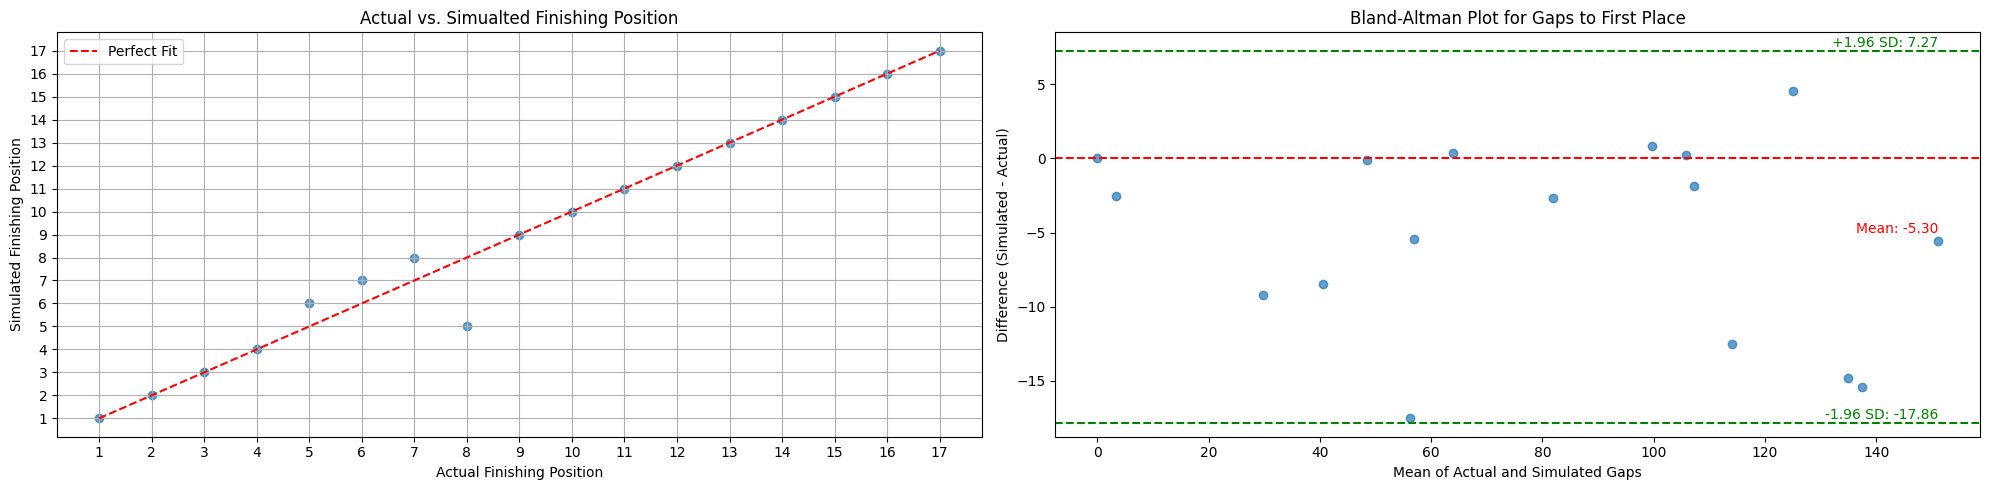

In [20]:
evaluation_mexico.plot_evaluation_results()

In [21]:
evaluation_mexico.calculate_general_errors()

{'total_absolute_position_error': 6.0,
 'position_mae': np.float64(0.35294117647058826),
 'total_absolute_overtake_error': np.int64(58),
 'overtake_mae': np.float64(3.411764705882353),
 'cumulative_time_mae': np.float64(244.83821941256102),
 'gap_mae': np.float64(6.009178585971741)}

In [22]:
evaluation_mexico.calculate_spearman()

{'cumulative_times': {'correlation': np.float64(0.42156862745098045),
  'p_value': np.float64(0.09191262861281846)},
 'gaps_to_leader': {'correlation': np.float64(0.985294117647059),
  'p_value': np.float64(6.341615043472023e-13)}}

In [23]:
evaluation_mexico.calculate_wilcoxon()

{'cumulative_times': {'statistic': np.float64(0.0),
  'expected_value': np.float64(76.5),
  'p_value': np.float64(1.52587890625e-05)},
 'gaps_to_leader': {'statistic': np.float64(17.0),
  'expected_value': np.float64(68.0),
  'p_value': np.float64(0.008360653818070695)}}

In [24]:
def run_optimisation(optimise, max_iterations, population_size, generations):
	start_time_bayesian = time.perf_counter()
	strategies_bayesian = optimise.bayesian_optimisation(max_iterations=max_iterations)
	runtime_bayesian = time.perf_counter() - start_time_bayesian
	
	start_time_genetic = time.perf_counter()
	strategies_genetic = optimise.genetic_algorithm_optimisation(population_size=population_size, generations=generations)
	runtime_genetic = time.perf_counter() - start_time_genetic
	
	actual_strategy = optimise.get_actual_strategy()

	return strategies_bayesian, runtime_bayesian, strategies_genetic, runtime_genetic, actual_strategy

In [25]:
def print_results(race_name, strategies_bayesian, runtime_bayesian, strategies_genetic, runtime_genetic, actual_strategy_data):
    print(f"=== {race_name} Results ===")
    print(f"Bayesian Optimization Runtime: {runtime_bayesian:.2f} seconds")
    print("Top 10 Bayesian Optimization Strategies:")
    for i, strategy in enumerate(strategies_bayesian[:10], start=1):
        print(f"  {i}. Strategy: {strategy['strategy']}, Final Position: {strategy['position']}")

    print(f"\nGenetic Algorithm Runtime: {runtime_genetic:.2f} seconds")
    print("Top 10 Genetic Algorithm Strategies:")
    for i, strategy in enumerate(strategies_genetic[:10], start=1):
        print(f"  {i}. Strategy: {strategy['strategy']}, Final Position: {strategy['final_position']}")

    print("\nActual Strategy:")
    print(f"  Strategy: {actual_strategy_data['actual_strat']}")
    print(f"  Finishing Position: {actual_strategy_data['actual_finishing_pos']}")

    print("=" * 40) 

In [26]:
from concurrent.futures import ThreadPoolExecutor

optimisation_params = (200, 50, 6)

with ThreadPoolExecutor(max_workers=6) as executor:
    mexico_44 = executor.submit(run_optimisation, optimise_mexico_44, *optimisation_params)

    mexico_63 = executor.submit(run_optimisation, optimise_mexico_63, *optimisation_params)


    mexico_result_44 = mexico_44.result()

    mexico_result_63 = mexico_63.result()


mexico_bayesian_44, mexico_bayesian_runtime_44, mexico_genetic_44, mexico_genetic_runtime_44, mexico_actual_44 = mexico_result_44
mexico_bayesian_63, mexico_bayesian_runtime_63, mexico_genetic_63, mexico_genetic_runtime_63, mexico_actual_63 = mexico_result_63

|   iter    |  target   | num_pi... | pit1_lap  | pit1_tyre | pit2_lap  | pit2_tyre | pit3_lap  | pit3_tyre | start_... |
-------------------------------------------------------------------------------------------------------------------------
|   iter    |  target   | num_pi... | pit1_lap  | pit1_tyre | pit2_lap  | pit2_tyre | pit3_lap  | pit3_tyre | start_... |
-------------------------------------------------------------------------------------------------------------------------
| 1         | -15.0     | 1.749     | 66.65     | 2.464     | 42.71     | 1.312     | 12.61     | 1.116     | 2.732     |
| 1         | -7.0      | 1.749     | 66.65     | 2.464     | 42.71     | 1.312     | 12.61     | 1.116     | 2.732     |
| 2         | -17.0     | 2.202     | 50.15     | 1.041     | 67.95     | 2.665     | 16.44     | 1.364     | 1.367     |
| 3         | -20.0     | 1.608     | 37.68     | 1.864     | 21.8      | 2.224     | 11.49     | 1.584     | 1.733     |
| 4         | -20.0     

In [27]:
print_results("Mexico GP", mexico_bayesian_44, mexico_bayesian_runtime_44, mexico_genetic_44, mexico_genetic_runtime_44, mexico_actual_44)

=== Mexico GP Results ===
Bayesian Optimization Runtime: 519.79 seconds
Top 10 Bayesian Optimization Strategies:
  1. Strategy: {1: np.int64(3), 34: np.int64(2)}, Final Position: 4.0
  2. Strategy: {1: np.int64(3), 35: np.int64(2)}, Final Position: 4.0
  3. Strategy: {1: np.int64(3), 32: np.int64(2)}, Final Position: 4.0
  4. Strategy: {1: np.int64(3), 34: np.int64(2), 47: np.int64(2)}, Final Position: 4.0
  5. Strategy: {1: np.int64(3), 33: np.int64(2), 46: np.int64(3)}, Final Position: 4.0
  6. Strategy: {1: np.int64(2), 16: np.int64(3)}, Final Position: 4.0
  7. Strategy: {1: np.int64(3), 32: np.int64(2)}, Final Position: 4.0
  8. Strategy: {1: np.int64(3), 32: np.int64(2)}, Final Position: 4.0
  9. Strategy: {1: np.int64(3), 32: np.int64(2)}, Final Position: 4.0
  10. Strategy: {1: np.int64(3), 32: np.int64(2), 47: np.int64(2)}, Final Position: 4.0

Genetic Algorithm Runtime: 308.32 seconds
Top 10 Genetic Algorithm Strategies:
  1. Strategy: {1: np.int64(3), 64: np.int64(2), 37: np

In [28]:
print_results("Mexico GP", mexico_bayesian_63, mexico_bayesian_runtime_63, mexico_genetic_63, mexico_genetic_runtime_63, mexico_actual_63)

=== Mexico GP Results ===
Bayesian Optimization Runtime: 434.58 seconds
Top 10 Bayesian Optimization Strategies:
  1. Strategy: {1: np.int64(2), 3: np.int64(2), 41: np.int64(3)}, Final Position: 4.0
  2. Strategy: {1: np.int64(3), 3: np.int64(2)}, Final Position: 5.0
  3. Strategy: {1: np.int64(2), 32: np.int64(2), 45: np.int64(3)}, Final Position: 5.0
  4. Strategy: {1: np.int64(3), 10: np.int64(2)}, Final Position: 5.0
  5. Strategy: {1: np.int64(3), 20: np.int64(2), 42: np.int64(3)}, Final Position: 5.0
  6. Strategy: {1: np.int64(2), 22: np.int64(2), 40: np.int64(3)}, Final Position: 5.0
  7. Strategy: {1: np.int64(2), 27: np.int64(3), 53: np.int64(2)}, Final Position: 5.0
  8. Strategy: {1: np.int64(3), 7: np.int64(2)}, Final Position: 5.0
  9. Strategy: {1: np.int64(3), 22: np.int64(2), 39: np.int64(2)}, Final Position: 5.0
  10. Strategy: {1: np.int64(2), 26: np.int64(3)}, Final Position: 5.0

Genetic Algorithm Runtime: 334.62 seconds
Top 10 Genetic Algorithm Strategies:
  1. St